## Import needed libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt

import sklearn.svm as svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

# Upload data

In [2]:
test_data = pd.read_csv('./mitbih_test.csv/mitbih_test.csv', index_col=None, header=None)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CLASS:  0.0


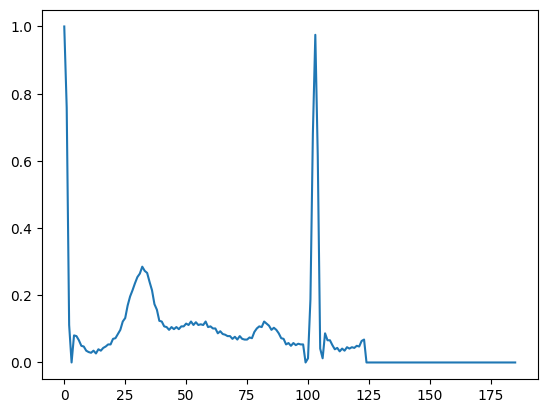

In [3]:
plt.plot(test_data.iloc[0,:186])
print("CLASS: ", test_data.iloc[0,187])

In [4]:
train_data = pd.read_csv('./mitbih_train.csv/mitbih_train.csv', index_col=None, header=None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

|**Super-Class** | **Annotations** | **Sub-Classes**|
| --- | --- | --- |
| Normal heartbeat | N | e, j, N, L, R |
| Supraventricular ectopic heartbeat | S | a, A, J, S |
| Ventricular ectopic heartbeat | V | E, V |
| Fusion heartbeat | F | F |
| Unclassified heartbeat | Q | f, P, Q|

In [5]:
train_data[187] = train_data[187].astype(int)
train_data[187].value_counts()


187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

In [6]:
X = train_data.iloc[:, :-1]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y = train_data.iloc[:, -1]
y

0        0
1        0
2        0
3        0
4        0
        ..
87549    4
87550    4
87551    4
87552    4
87553    4
Name: 187, Length: 87554, dtype: int32

# Preprocess data

#### Denoise data through the Discrete-Wavelet-Transform-based denoising technique

In [25]:
def denoise_ecg(ecg_signal):
    wavelet = 'db4' 
    level = 6  
    coeffs = pywt.wavedec(ecg_signal, wavelet, level=level)

    threshold = np.std(coeffs[-1]) * np.sqrt(2 * np.log(len(ecg_signal)))
    coeffs_thresh = [pywt.threshold(c, threshold, mode='soft') if i == level else c for i, c in enumerate(coeffs)]

    ecg_denoised = pywt.waverec(coeffs_thresh, wavelet)

    return ecg_denoised

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


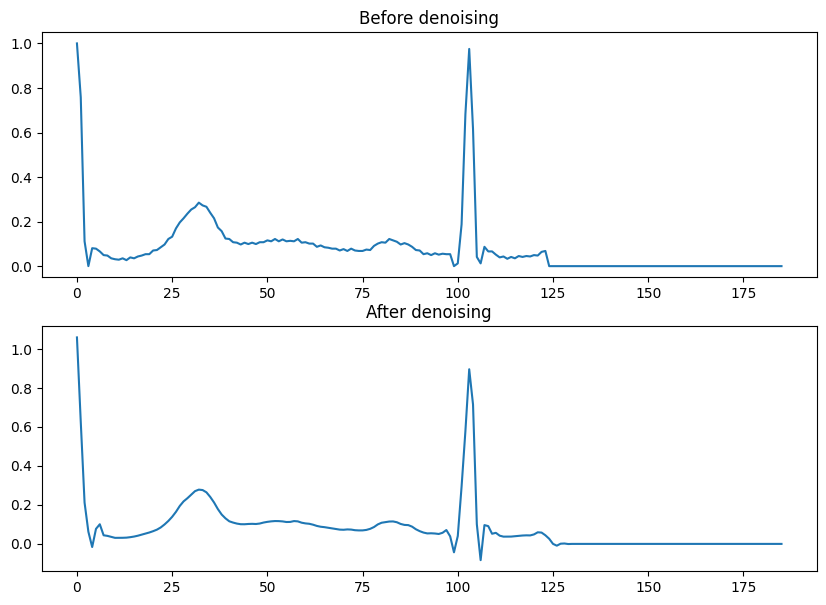

In [9]:
## example of denoising
denoised_ecg = denoise_ecg(test_data.iloc[0,:186])

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.plot(test_data.iloc[0,:186])
plt.title("Before denoising") ## class

plt.subplot(2, 1, 2 )
plt.plot(denoised_ecg)
plt.title("After denoising") ## class
plt.show()

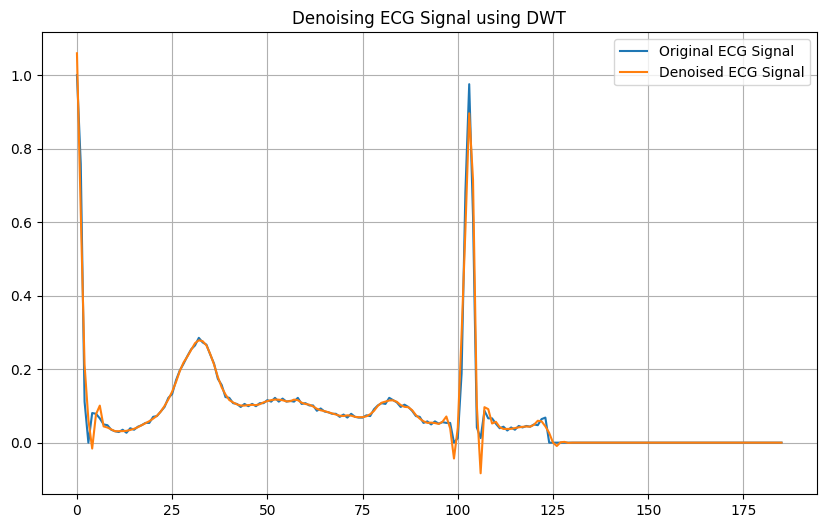

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(test_data.iloc[0,:186], label='Original ECG Signal')
plt.plot(denoised_ecg, label='Denoised ECG Signal')
plt.title('Denoising ECG Signal using DWT')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
## Denoise all the data
denoised_test_data = test_data.copy()
denoised_test_data.iloc[:, :186] = [denoise_ecg(test_data.iloc[i, :186]) for i in range(len(test_data))]

denoised_train_data = train_data.copy()
denoised_train_data.iloc[:, :186] = [denoise_ecg(train_data.iloc[i, :186]) for i in range(len(train_data))]
denoised_train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.997297,0.912558,0.679431,0.282240,0.115499,0.197678,0.159140,0.082406,0.060336,0.046634,...,9.986470e-18,9.858808e-18,9.765192e-18,9.700593e-18,9.433753e-18,8.947039e-18,8.346659e-18,7.568335e-18,0.0,0
1,0.995487,0.800795,0.508353,0.217868,0.056799,0.127462,0.112636,0.078391,0.080724,0.078732,...,-1.556202e-17,-1.578897e-17,-1.579296e-17,-1.575145e-17,-1.558762e-17,-1.522356e-17,-1.482112e-17,-1.433914e-17,0.0,0
2,1.030805,0.554976,0.272532,0.112040,-0.002939,0.067462,0.072813,0.042364,0.048055,0.050102,...,-2.113167e-18,-2.060095e-18,-1.987656e-18,-1.893582e-18,-1.818600e-18,-1.766427e-18,-1.715751e-18,-1.677829e-18,0.0,0
3,0.919619,0.688383,0.509724,0.311527,0.164306,0.100234,0.057758,0.065371,0.066851,0.056863,...,-9.880593e-18,-9.488478e-18,-9.048442e-18,-8.545831e-18,-8.069320e-18,-7.630752e-18,-7.176687e-18,-6.732598e-18,0.0,0
4,0.980169,0.986918,0.845276,0.567564,0.371460,0.245268,0.140596,0.107470,0.103157,0.137667,...,1.363849e-17,1.240357e-17,1.109912e-17,9.561921e-18,8.354574e-18,7.583859e-18,6.862011e-18,6.360452e-18,0.0,0


c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


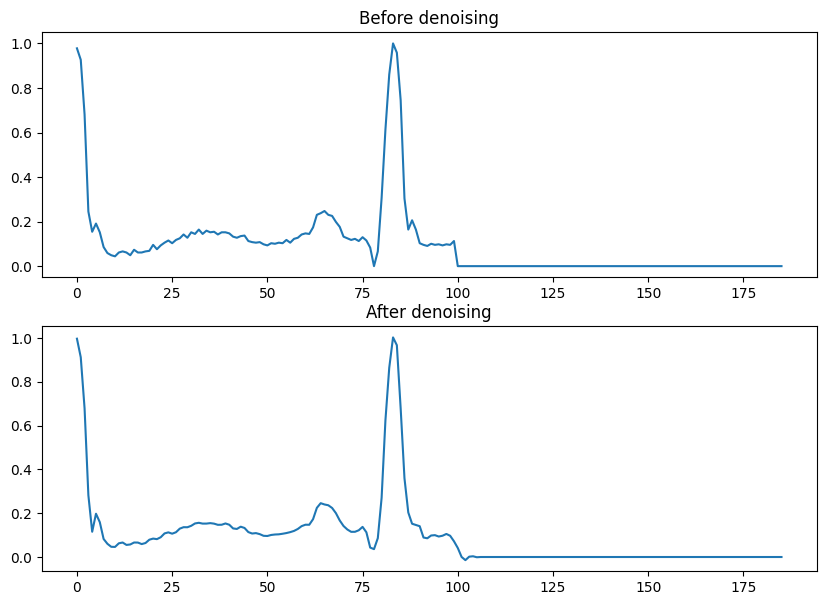

In [12]:
denoised_ecg = denoise_ecg(train_data.iloc[0,:186])

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.plot(train_data.iloc[0,:186])
plt.title("Before denoising") ## class

plt.subplot(2, 1, 2 )
plt.plot(denoised_ecg)
plt.title("After denoising") ## class
plt.show()

#### Data resampling

In [13]:
smote = SMOTE(random_state=42)

X_test = denoised_test_data.iloc[:, :186] 
y_test = denoised_test_data.iloc[:, 187]  

X_resampled, y_resampled = smote.fit_resample(X_test, y_test)

resampled_test_data = pd.DataFrame(X_resampled, columns=X_test.columns)
resampled_test_data['Class'] = y_resampled

print(resampled_test_data['Class'].value_counts())


Class
0.0    18118
1.0    18118
2.0    18118
3.0    18118
4.0    18118
Name: count, dtype: int64


C:\Users\karol\AppData\Local\Temp\ipykernel_3452\171795914.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_test_data['Class'] = y_resampled


In [14]:
resampled_test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,Class
0,1.059264,0.626187,0.211879,0.062506,-0.016052,0.077190,0.100762,0.044232,0.041177,0.036251,...,-6.363849e-18,-6.488302e-18,-6.678518e-18,-6.847293e-18,-7.020703e-18,-7.071436e-18,-6.977123e-18,-6.816153e-18,-6.549296e-18,0.0
1,0.927705,0.734179,0.569428,0.386272,0.328196,0.349661,0.341602,0.304932,0.298095,0.294915,...,-7.810493e-18,-7.296682e-18,-6.330631e-18,-5.254981e-18,-3.954899e-18,-3.034359e-18,-2.584527e-18,-2.233373e-18,-2.158871e-18,0.0
2,0.724499,0.186248,0.029104,0.117775,0.094554,0.099859,0.117196,0.118306,0.122783,0.118355,...,9.611947e-18,9.775203e-18,1.005630e-17,1.030415e-17,1.056549e-17,1.060737e-17,1.039070e-17,1.005893e-17,9.541266e-18,0.0
3,1.012300,0.892204,0.699347,0.456289,0.237727,0.079332,-0.013415,0.002401,0.020162,0.056551,...,-4.785697e-18,-4.421019e-18,-3.728103e-18,-2.991106e-18,-2.119952e-18,-1.464525e-18,-1.087811e-18,-7.576732e-19,-5.802219e-19,0.0
4,0.575499,0.390677,0.252044,0.117412,0.023844,0.016377,0.022529,0.068990,0.091224,0.079533,...,-8.659092e-18,-8.560676e-18,-8.797868e-18,-8.878370e-18,-8.939105e-18,-8.898886e-18,-8.691968e-18,-8.454357e-18,-8.146060e-18,0.0


In [15]:
smote = SMOTE(random_state=42)

X_train = denoised_train_data.iloc[:, :186] 
y_train = denoised_train_data.iloc[:, 187]  

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

resampled_train_data = pd.DataFrame(X_resampled, columns=X_train.columns)
resampled_train_data['Class'] = y_resampled

eq = resampled_train_data['Class'].value_counts()
print(resampled_train_data['Class'].value_counts())

Class
0    72471
1    72471
2    72471
3    72471
4    72471
Name: count, dtype: int64


C:\Users\karol\AppData\Local\Temp\ipykernel_3452\3107624753.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_train_data['Class'] = y_resampled


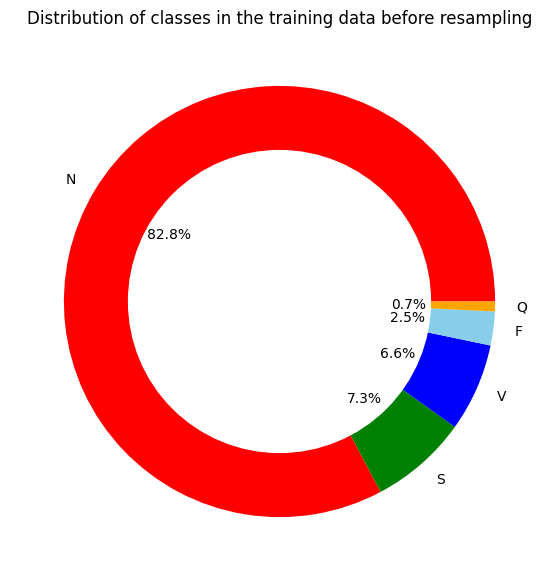

In [16]:
eq2 = train_data[187].value_counts()

plt.figure(figsize=(10,7))
plt.title('Distribution of classes in the training data before resampling')
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(eq2, labels=['N','S','V','F','Q'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

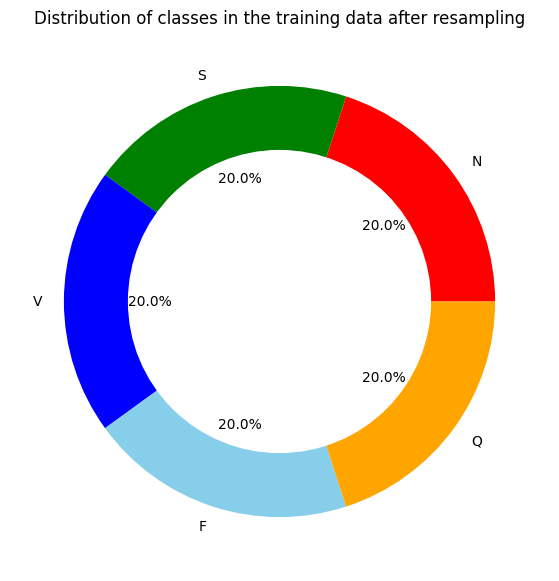

In [17]:
plt.figure(figsize=(10,7))
plt.title('Distribution of classes in the training data after resampling')
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(eq, labels=['N','S','V','F','Q'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [18]:
resampled_test_data

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,Class
0,1.059264,0.626187,0.211879,0.062506,-0.016052,0.077190,0.100762,0.044232,0.041177,0.036251,...,-6.363849e-18,-6.488302e-18,-6.678518e-18,-6.847293e-18,-7.020703e-18,-7.071436e-18,-6.977123e-18,-6.816153e-18,-6.549296e-18,0.0
1,0.927705,0.734179,0.569428,0.386272,0.328196,0.349661,0.341602,0.304932,0.298095,0.294915,...,-7.810493e-18,-7.296682e-18,-6.330631e-18,-5.254981e-18,-3.954899e-18,-3.034359e-18,-2.584527e-18,-2.233373e-18,-2.158871e-18,0.0
2,0.724499,0.186248,0.029104,0.117775,0.094554,0.099859,0.117196,0.118306,0.122783,0.118355,...,9.611947e-18,9.775203e-18,1.005630e-17,1.030415e-17,1.056549e-17,1.060737e-17,1.039070e-17,1.005893e-17,9.541266e-18,0.0
3,1.012300,0.892204,0.699347,0.456289,0.237727,0.079332,-0.013415,0.002401,0.020162,0.056551,...,-4.785697e-18,-4.421019e-18,-3.728103e-18,-2.991106e-18,-2.119952e-18,-1.464525e-18,-1.087811e-18,-7.576732e-19,-5.802219e-19,0.0
4,0.575499,0.390677,0.252044,0.117412,0.023844,0.016377,0.022529,0.068990,0.091224,0.079533,...,-8.659092e-18,-8.560676e-18,-8.797868e-18,-8.878370e-18,-8.939105e-18,-8.898886e-18,-8.691968e-18,-8.454357e-18,-8.146060e-18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90585,0.999781,0.932845,0.870391,0.800945,0.711246,0.613320,0.503337,0.383512,0.303758,0.269952,...,-1.067476e-17,-1.111030e-17,-1.181957e-17,-1.273454e-17,-1.389653e-17,-1.447675e-17,-1.439457e-17,-1.407588e-17,-1.328774e-17,4.0
90586,0.988583,0.973077,0.956275,0.935180,0.917742,0.907159,0.897338,0.891569,0.890506,0.894528,...,7.467216e-18,6.037189e-18,3.650706e-18,1.068086e-18,-1.970342e-18,-4.095147e-18,-5.103003e-18,-5.835404e-18,-5.890501e-18,4.0
90587,0.845224,0.601886,0.537425,0.591107,0.577519,0.559567,0.524877,0.453207,0.329600,0.140393,...,2.384896e-18,2.329541e-18,2.246426e-18,2.183748e-18,2.126506e-18,2.042520e-18,1.933408e-18,1.803684e-18,1.645012e-18,4.0
90588,0.840753,0.573007,0.501398,0.559026,0.543305,0.523410,0.484833,0.405585,0.282551,0.101977,...,3.883841e-19,3.078292e-19,3.018335e-19,1.732053e-19,-2.632111e-20,-1.359618e-19,-1.642042e-19,-1.515870e-19,-5.960600e-20,4.0


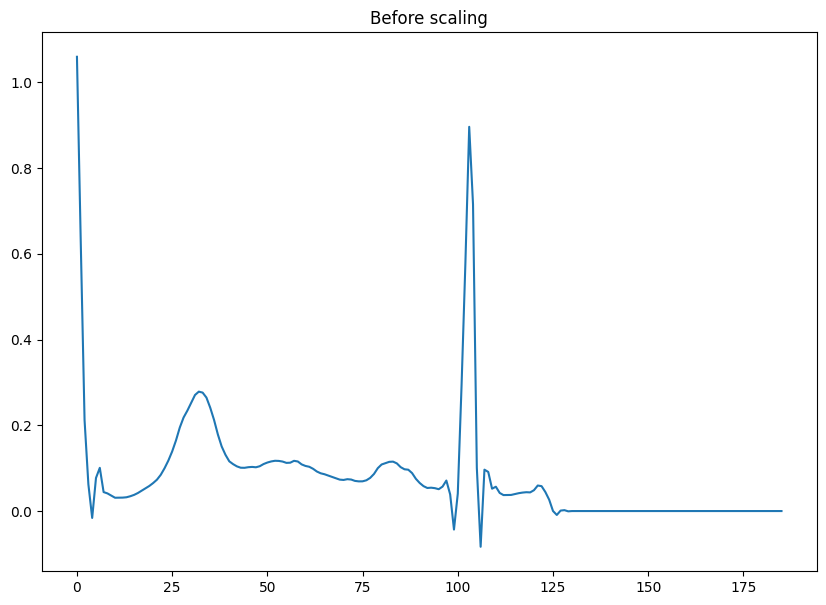

In [19]:
plt.figure(figsize=(10, 7))
plt.plot(resampled_test_data.iloc[0,:186])
plt.title("Before scaling") ## class
plt.show()

In [20]:
scaler = MinMaxScaler()
resampled_test_data.iloc[:, :186] = scaler.fit_transform(resampled_test_data.iloc[:, :186])

scaler2 = MinMaxScaler()
resampled_train_data.iloc[:, :186] = scaler2.fit_transform(resampled_train_data.iloc[:, :186])


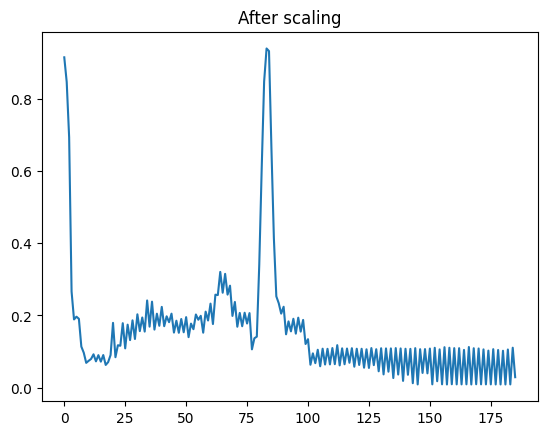

In [21]:
plt.plot(resampled_train_data.iloc[0,:186])
plt.title("After scaling") ## class
plt.show()

### Saving preprocessed data

In [ ]:
# Saving the preprocessed data
resampled_test_data.to_csv('resampled_test_data.csv', index=False)

resampled_train_data.to_csv('resampled_train_data.csv', index=False)

### Uploading ready data

In [56]:
# Load the preprocessed data
resampled_test_data = pd.read_csv('../data/resampled_test_data.csv')
resampled_train_data = pd.read_csv('../data/resampled_train_data.csv')

# Models

In [57]:
resampled_train_data.iloc[:, :-1]

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
0,0.915350,0.847103,0.693633,0.266260,0.189083,0.196662,0.190801,0.113920,0.096798,0.068762,...,0.106673,0.008894,0.104384,0.008892,0.102309,0.008851,0.105743,0.009022,0.110714,0.02902
1,0.913771,0.749107,0.532344,0.205533,0.138470,0.130453,0.146370,0.110044,0.116248,0.100114,...,0.106673,0.008894,0.104384,0.008892,0.102309,0.008851,0.105743,0.009022,0.110714,0.02902
2,0.944589,0.533567,0.310017,0.105696,0.086962,0.073877,0.108323,0.075254,0.085082,0.072149,...,0.106673,0.008894,0.104384,0.008892,0.102309,0.008851,0.105743,0.009022,0.110714,0.02902
3,0.847568,0.650541,0.533637,0.293889,0.231166,0.104780,0.093939,0.097470,0.103013,0.078753,...,0.106673,0.008894,0.104384,0.008892,0.102309,0.008851,0.105743,0.009022,0.110714,0.02902
4,0.900404,0.912303,0.849989,0.535430,0.409780,0.241536,0.173084,0.138124,0.137648,0.157682,...,0.106673,0.008894,0.104384,0.008892,0.102309,0.008851,0.105743,0.009022,0.110714,0.02902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362350,0.687907,0.585410,0.514666,0.320779,0.261681,0.098181,0.061005,0.046650,0.067012,0.105245,...,0.106673,0.008894,0.104384,0.008892,0.102309,0.008851,0.105743,0.009022,0.110714,0.02902
362351,0.735120,0.539398,0.507403,0.467216,0.486926,0.422538,0.420273,0.358607,0.283040,0.168499,...,0.106673,0.008894,0.104384,0.008892,0.102309,0.008851,0.105743,0.009022,0.110714,0.02902
362352,0.893950,0.859397,0.875391,0.758524,0.698997,0.563306,0.493828,0.399814,0.321074,0.256019,...,0.106673,0.008894,0.104384,0.008892,0.102309,0.008851,0.105743,0.009022,0.110714,0.02902
362353,0.677926,0.591864,0.546988,0.389593,0.344092,0.190683,0.144429,0.098761,0.077017,0.060906,...,0.106673,0.008894,0.104384,0.008892,0.102309,0.008851,0.105743,0.009022,0.110714,0.02902


### CNN model



Epoch 1/10


11324/11324 [==============================] - 29s 2ms/step - loss: 0.3043 - accuracy: 0.8891
Epoch 2/10
11324/11324 [==============================] - 28s 2ms/step - loss: 0.1467 - accuracy: 0.9488
Epoch 3/10
11324/11324 [==============================] - 27s 2ms/step - loss: 0.1085 - accuracy: 0.9628
Epoch 4/10
11324/11324 [==============================] - 28s 2ms/step - loss: 0.0893 - accuracy: 0.9692
Epoch 5/10
11324/11324 [==============================] - 27s 2ms/step - loss: 0.0770 - accuracy: 0.9738
Epoch 6/10
11324/11324 [==============================] - 28s 2ms/step - loss: 0.0689 - accuracy: 0.9769
Epoch 7/10
11324/11324 [==============================] - 28s 2ms/step - loss: 0.0621 - accuracy: 0.9791
Epoch 8/10
11324/11324 [==============================] - 28s 3ms/step - loss: 0.0570 - accuracy: 0.9807
Epoch 9/10
11324/11324 [==============================] - 28s 2ms/step - loss: 0.0532 - accuracy: 0.9821
Epoch 10/10
2831/2831 [============================

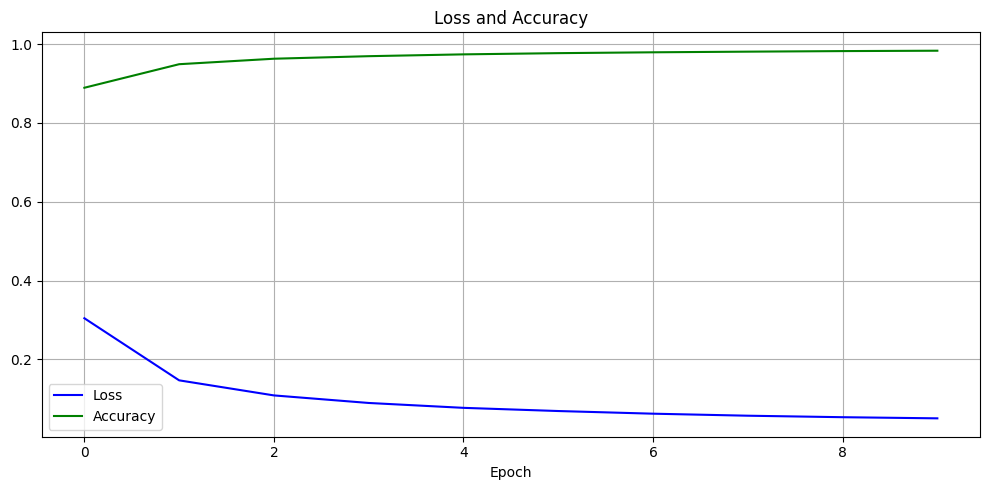

In [25]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[186]),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(resampled_train_data.iloc[:, :-1],resampled_train_data.iloc[:,-1], epochs=10, batch_size=32)

y_pred = model.predict(resampled_test_data.iloc[:, :-1])
y_pred = np.argmax(y_pred, axis=1)

###---------------------------------------------------------
print(classification_report(resampled_test_data.iloc[:, -1], y_pred))

loss = history.history['loss']
accuracy = history.history['accuracy']

plt.figure(figsize=(10, 5))
plt.plot(loss, label='Loss', color='blue')
plt.plot(accuracy, label='Accuracy', color='green')
plt.legend()
plt.grid(True)
plt.xlabel('Epoch')
plt.title('Loss and Accuracy')
plt.tight_layout()
plt.show()

In [ ]:
model.save('model_cnn.h5')

### CNN model with RMSprop as optimizer

Epoch 1/10
11324/11324 [==============================] - 18s 2ms/step - loss: 0.3098 - accuracy: 0.8862
Epoch 2/10
11324/11324 [==============================] - 18s 2ms/step - loss: 0.1613 - accuracy: 0.9432
Epoch 3/10
11324/11324 [==============================] - 18s 2ms/step - loss: 0.1280 - accuracy: 0.9563
Epoch 4/10
11324/11324 [==============================] - 18s 2ms/step - loss: 0.1117 - accuracy: 0.9629
Epoch 5/10
11324/11324 [==============================] - 19s 2ms/step - loss: 0.1034 - accuracy: 0.9664
Epoch 6/10
11324/11324 [==============================] - 19s 2ms/step - loss: 0.1002 - accuracy: 0.9686
Epoch 7/10
11324/11324 [==============================] - 19s 2ms/step - loss: 0.0973 - accuracy: 0.9697
Epoch 8/10
11324/11324 [==============================] - 18s 2ms/step - loss: 0.0970 - accuracy: 0.9709
Epoch 9/10
11324/11324 [==============================] - 18s 2ms/step - loss: 0.0964 - accuracy: 0.9717
Epoch 10/10
2831/2831 [==============================] 

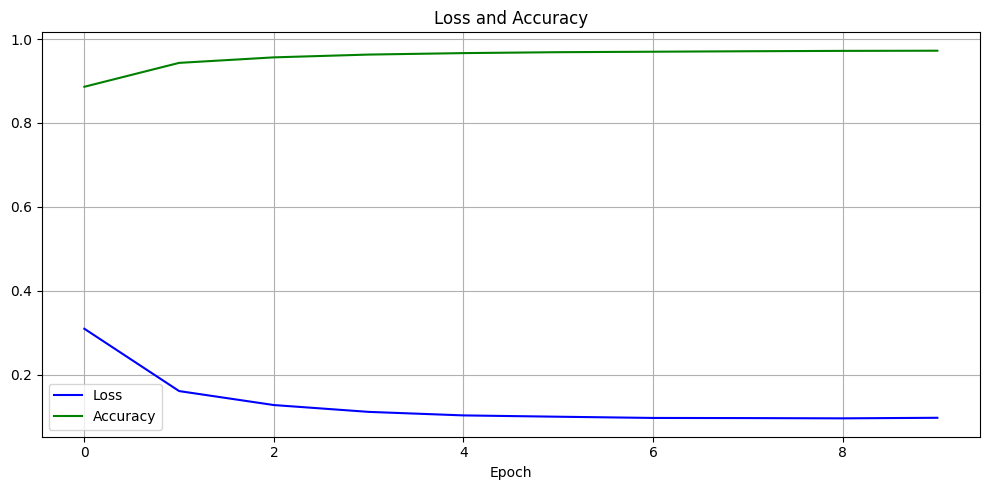

In [66]:
# CNN2
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[186]),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='RMSprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(resampled_train_data.iloc[:, :-1],resampled_train_data.iloc[:,-1], epochs=10, batch_size=32)

y_pred = model.predict(resampled_test_data.iloc[:, :-1])
y_pred = np.argmax(y_pred, axis=1)

###---------------------------------------------------------
print(classification_report(resampled_test_data.iloc[:, -1], y_pred))

loss = history.history['loss']
accuracy = history.history['accuracy']

plt.figure(figsize=(10, 5))
plt.plot(loss, label='Loss', color='blue')
plt.plot(accuracy, label='Accuracy', color='green')
plt.legend()
plt.grid(True)
plt.xlabel('Epoch')
plt.title('Loss and Accuracy')
plt.tight_layout()
plt.show()

In [67]:
evaluation = model.evaluate(resampled_test_data.iloc[:, :-1], resampled_test_data.iloc[:, -1], return_dict=True)
print(f'Accuracy: {evaluation["accuracy"]}')
print(f'Loss: {evaluation["loss"]}')

2831/2831 [==============================] - 4s 1ms/step - loss: 0.5376 - accuracy: 0.9286
Accuracy: 0.9286013841629028
Loss: 0.5375887155532837


In [68]:
model.save('model_cnn2.h5')

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### LSTM

Epoch 1/10
11324/11324 [==============================] - 615s 54ms/step - loss: 1.1310 - accuracy: 0.5352
Epoch 2/10
11324/11324 [==============================] - 578s 51ms/step - loss: 0.5420 - accuracy: 0.8047
Epoch 3/10
11324/11324 [==============================] - 557s 49ms/step - loss: 0.3872 - accuracy: 0.8619
Epoch 4/10
11324/11324 [==============================] - 552s 49ms/step - loss: 0.3607 - accuracy: 0.8733
Epoch 5/10
11324/11324 [==============================] - 552s 49ms/step - loss: 0.2632 - accuracy: 0.9069
Epoch 6/10
11324/11324 [==============================] - 682s 60ms/step - loss: 0.2121 - accuracy: 0.9257
Epoch 7/10
11324/11324 [==============================] - 570s 50ms/step - loss: 0.1839 - accuracy: 0.9360
Epoch 8/10
11324/11324 [==============================] - 618s 55ms/step - loss: 0.1643 - accuracy: 0.9432
Epoch 9/10
11324/11324 [==============================] - 600s 53ms/step - loss: 0.1492 - accuracy: 0.9486
Epoch 10/10
2831/2831 [==============

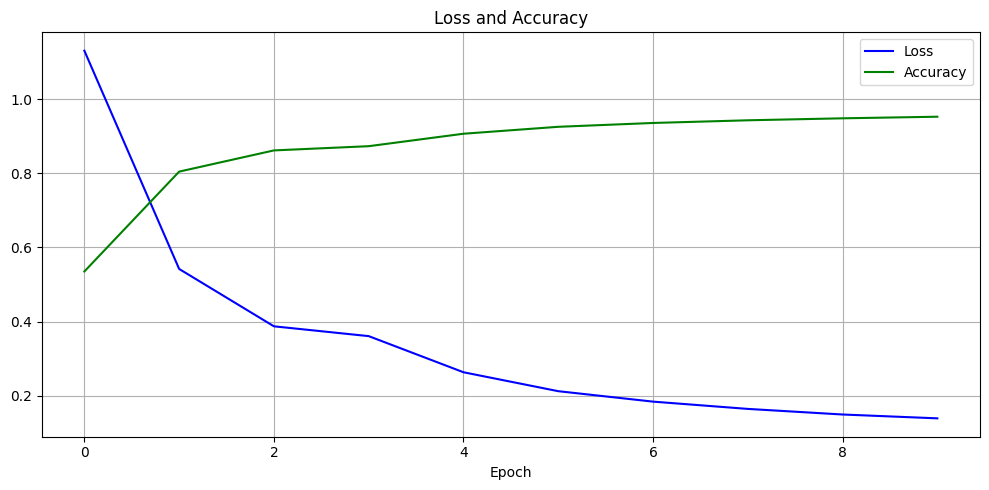

In [126]:
model_lstm = keras.Sequential([
    layers.LSTM(64, input_shape=[186, 1]),
    layers.Dense(5, activation='softmax')
])

model_lstm.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# X = X.values.reshape(-1, 186, 1)
history2 = model_lstm.fit(resampled_train_data.iloc[:, :-1],resampled_train_data.iloc[:,-1], epochs=10, batch_size=32)

X_test = resampled_test_data.iloc[:, :-1].values.reshape(-1, 186, 1)
y_pred = model_lstm.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

## ---------------------------------------------------------
print(classification_report(resampled_test_data.iloc[:, -1], y_pred))

loss = history2.history['loss']
accuracy = history2.history['accuracy']

plt.figure(figsize=(10, 5))
plt.plot(loss, label='Loss', color='blue')
plt.plot(accuracy, label='Accuracy', color='green')
plt.legend()
plt.grid(True)
plt.xlabel('Epoch')
plt.title('Loss and Accuracy')
plt.tight_layout()
plt.show()



In [128]:
#save model
model_lstm.save('model_lstm.h5')

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### ResNet


Epoch 1/10


11324/11324 [==============================] - 238s 21ms/step - loss: 0.4394 - accuracy: 0.8378
Epoch 2/10
11324/11324 [==============================] - 224s 20ms/step - loss: 0.2148 - accuracy: 0.9233
Epoch 3/10
11324/11324 [==============================] - 217s 19ms/step - loss: 0.1572 - accuracy: 0.9441
Epoch 4/10
11324/11324 [==============================] - 207s 18ms/step - loss: 0.1261 - accuracy: 0.9560
Epoch 5/10
11324/11324 [==============================] - 206s 18ms/step - loss: 0.1033 - accuracy: 0.9641
Epoch 6/10
11324/11324 [==============================] - 206s 18ms/step - loss: 0.0869 - accuracy: 0.9703
Epoch 7/10
11324/11324 [==============================] - 206s 18ms/step - loss: 0.0741 - accuracy: 0.9748
Epoch 8/10
11324/11324 [==============================] - 206s 18ms/step - loss: 0.0649 - accuracy: 0.9779
Epoch 9/10
11324/11324 [==============================] - 205s 18ms/step - loss: 0.0581 - accuracy: 0.9803
Epoch 10/10
2831/2831 [===========

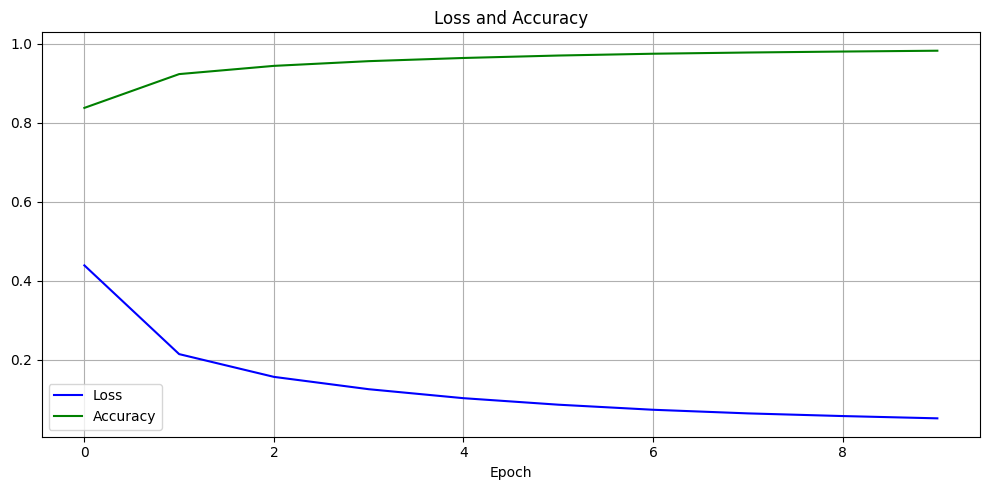

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
from keras import layers
from keras.models import Model
from keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

def residual_block(x, filters, kernel_size, dilation_rate):
    r = layers.Conv1D(filters, kernel_size, padding='same', dilation_rate=dilation_rate, activation='relu')(x)
    r = layers.Conv1D(filters, kernel_size, padding='same', dilation_rate=dilation_rate, activation='relu')(r)
    if x.shape[-1] != filters:
        x = layers.Conv1D(filters, 1, padding='same')(x)
    return layers.Add()([x, r])

def resnet_1d(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv1D(64, 3, padding='same', activation='relu')(inputs)
    x = residual_block(x, 64, 3, 2)
    x = residual_block(x, 64, 3, 1)
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

model_resnet = resnet_1d(input_shape=(186, 1), num_classes=5)

model_resnet.compile(optimizer=Adam(),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history_res = model_resnet.fit(resampled_train_data.iloc[:, :-1].values.reshape(-1, 186, 1),
                           resampled_train_data.iloc[:, -1],
                           epochs=10,
                           batch_size=32)

X_test = resampled_test_data.iloc[:, :-1].values.reshape(-1, 186, 1)
y_pred = model_resnet.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(resampled_test_data.iloc[:, -1], y_pred))

loss = history_res.history['loss']
accuracy = history_res.history['accuracy']

plt.figure(figsize=(10, 5))
plt.plot(loss, label='Loss', color='blue')
plt.plot(accuracy, label='Accuracy', color='green')
plt.legend()
plt.grid(True)
plt.xlabel('Epoch')
plt.title('Loss and Accuracy')
plt.tight_layout()
plt.show()

model_resnet.save('model_resnet.h5')

### CNN&LSTM

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 184, 64)           256       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 92, 64)            0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 92, 50)            23000     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_16 (Dense)            (None, 5)                 255       
                                                                 
Total params: 43711 (170.75 KB)
Trainable params: 43711 (170.75 KB)
Non-trainable params: 0 (0.00 Byte)
________________

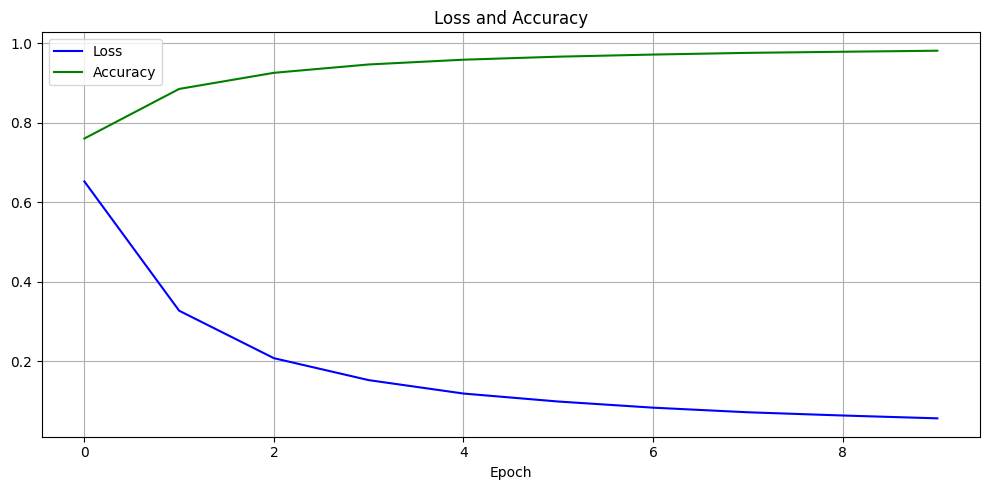

In [75]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=[186, 1]))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(resampled_train_data.iloc[:, :-1],resampled_train_data.iloc[:,-1], epochs=10, batch_size=32)

y_pred = model.predict(resampled_test_data.iloc[:, :-1])
y_pred = np.argmax(y_pred, axis=1)

###---------------------------------------------------------
print(classification_report(resampled_test_data.iloc[:, -1], y_pred))

loss = history.history['loss']
accuracy = history.history['accuracy']

plt.figure(figsize=(10, 5))
plt.plot(loss, label='Loss', color='blue')
plt.plot(accuracy, label='Accuracy', color='green')
plt.legend()
plt.grid(True)
plt.xlabel('Epoch')
plt.title('Loss and Accuracy')
plt.tight_layout()
plt.show()

In [76]:
evaluation = model.evaluate(resampled_test_data.iloc[:, :-1], resampled_test_data.iloc[:, -1], return_dict=True)
print(f'Accuracy: {evaluation["accuracy"]}')
print(f'Loss: {evaluation["loss"]}')

2831/2831 [==============================] - 55s 19ms/step - loss: 0.2191 - accuracy: 0.9413
Accuracy: 0.941307008266449
Loss: 0.21912990510463715


In [77]:
model.save('model_cnn&lstm.h5')

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing

In [99]:
with open('cardiogram_Mateusz.log', 'r') as file:
    log_data = file.readlines()
    
log_data = [line.strip() for line in log_data]
log_data = [line for line in log_data if line]
log_data = [float(line) for line in log_data]

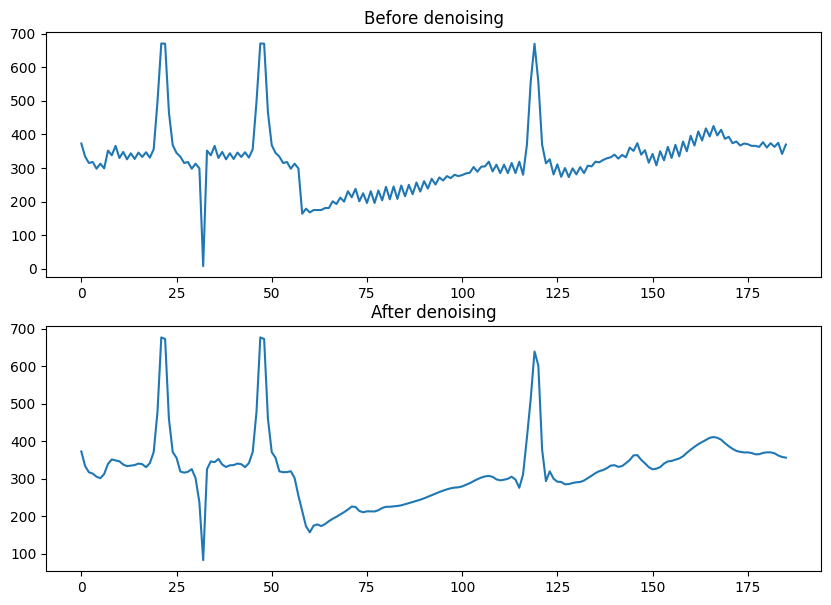

In [100]:
denoised_ecg_signal = denoise_ecg(log_data)
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.plot(log_data[:186])
plt.title("Before denoising") 

plt.subplot(2, 1, 2 )
plt.plot(denoised_ecg_signal[:186])
plt.title("After denoising")
plt.show()

##### How looks testing data

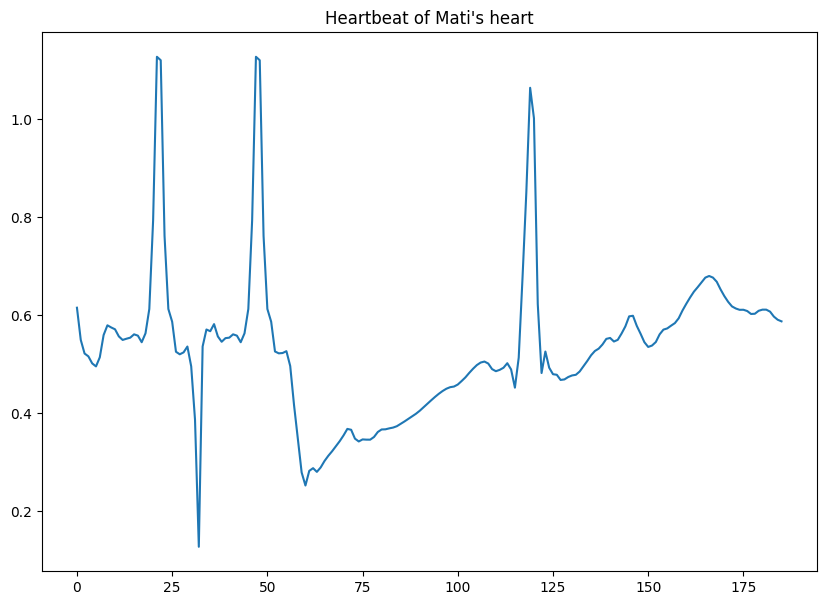

In [101]:
normalized_data_ex = (denoised_ecg_signal[0:186] - np.min(log_data[0:186])) / (np.max(denoised_ecg_signal[0:186]) - np.min(denoised_ecg_signal[0:186]))
plt.figure(figsize=(10, 7))
plt.plot(normalized_data_ex)
plt.title("Heartbeat of Mati's heart")
plt.show()

#### Data normalization

In [102]:
log_data = np.array(log_data)
denoised_ecg_signal = denoise_ecg(log_data)
normalized_data = (denoised_ecg_signal - np.min(denoised_ecg_signal)) / (np.max(denoised_ecg_signal) - np.min(denoised_ecg_signal))
print(normalized_data)
X_single_example = np.array([normalized_data]).reshape(1, normalized_data.shape[0], 1)

[0.47114035 0.40771282 0.38089526 ... 0.46858349 0.46954971 0.46946946]


In [103]:
def display_ecg_signal(log_data):
    normalized_data_ex = (log_data[0:186] - np.min(log_data[0:186])) / (np.max(log_data[0:186]) - np.min(log_data[0:186]))
    plt.figure(figsize=(10, 7))
    plt.plot(normalized_data_ex)
    plt.title("ECG Signal")
    plt.show()

def normalize_data(log_data):
    log_data = np.array(log_data)
    normalized_data = (log_data - np.min(log_data)) / (np.max(log_data) - np.min(log_data))
    return normalized_data

def predict(normalized_data, model):
    predictions_num = [0, 0, 0, 0, 0]
    labels = ['n', 's', 'v', 'f', 'q']
    windows_size = 186
    window_shift = 100
    total_windows = 0

    for i in range(0, normalized_data.shape[0] - windows_size + 1, window_shift):
        window = normalized_data[i:i + windows_size]
        window = window.reshape(1, window.shape[0], 1)
        predicted_probabilities = model.predict(window)
        predicted_class_index = np.argmax(predicted_probabilities)
        predictions_num[predicted_class_index] += 1
        total_windows += 1

    predicted_class_probabilities = [num / total_windows for num in predictions_num]
    sum_probabilities = sum(predicted_class_probabilities)
    predicted_class_probabilities = [round(prob / sum_probabilities, 2) for prob in predicted_class_probabilities]
    
    if sum(predicted_class_probabilities) != 1:
        diff = 1 - sum(predicted_class_probabilities)
        max_index = predicted_class_probabilities.index(max(predicted_class_probabilities))
        predicted_class_probabilities[max_index] += diff

    predicted_class_probabilities = {label: prob for label, prob in zip(labels, predicted_class_probabilities)}
    return predicted_class_probabilities

In [104]:
def predict_class(filename: str, model) -> int:
    with open(filename, 'r') as file:
        log_data = file.readlines()
    log_data = [line.strip() for line in log_data]
    log_data = [line for line in log_data if line]
    log_data = [float(line) for line in log_data]

    denoised_ecg_signal = denoise_ecg(log_data)

    display_ecg_signal(log_data=denoised_ecg_signal)
    normalized_data = normalize_data(log_data)
    predicted_class = predict(normalized_data=normalized_data, model=model)


    return predicted_class

In [105]:
model_cnn= keras.models.load_model('model_cnn.h5')
model_cnn2 = keras.models.load_model('model_cnn2.h5')
model_resnet = keras.models.load_model('model_resnet.h5')
model_lstm = keras.models.load_model('model_lstm.h5')
model_cnn_lstm = keras.models.load_model('model_cnn&lstm.h5')

> NOTE: Model named "model_cnn2" seems to work the best

#### CNN

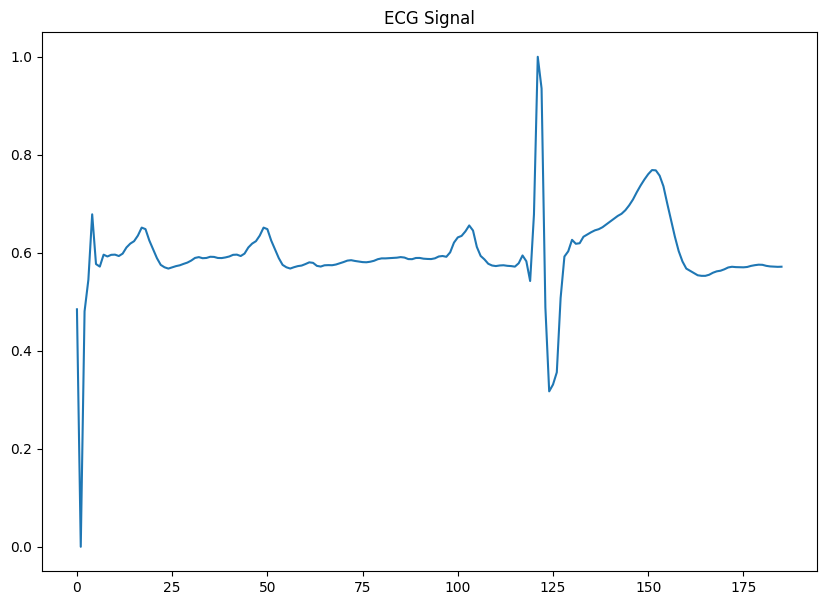

1/1 [==============================] - 0s 21ms/step


{'n': 0.5, 's': 0.01, 'v': 0.49, 'f': 0.0, 'q': 0.0}

In [106]:
predict_class("cardiogram_Maciek.log", model_cnn)

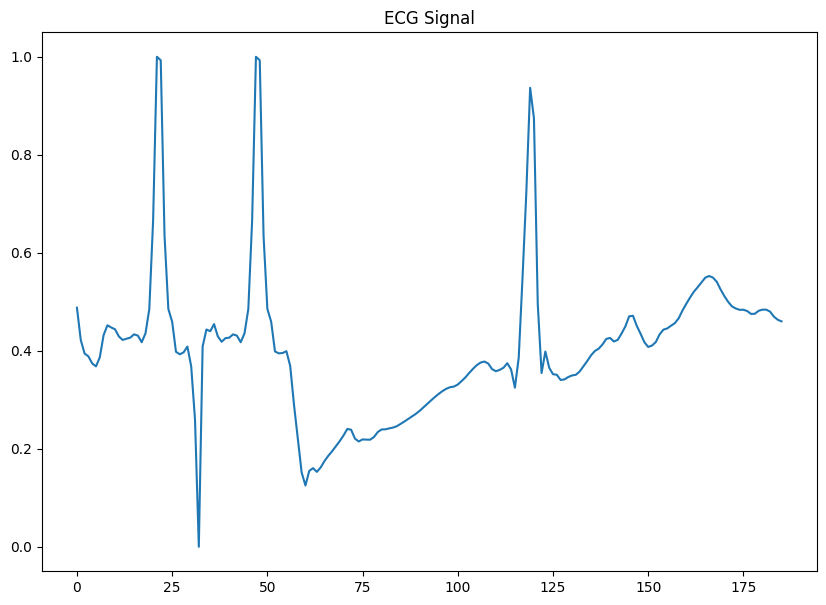

1/1 [==============================] - 0s 22ms/step


{'n': 0.52, 's': 0.15, 'v': 0.33, 'f': 0.0, 'q': 0.0}

In [107]:
predict_class("cardiogram_Mateusz.log", model_cnn)

#### CNN2

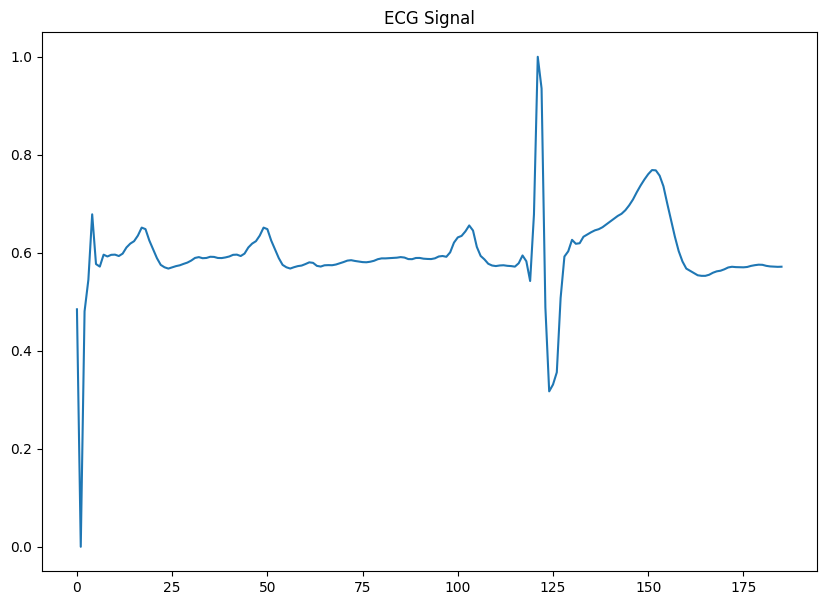

1/1 [==============================] - 0s 19ms/step


{'n': 0.84, 's': 0.16, 'v': 0.0, 'f': 0.0, 'q': 0.0}

In [108]:
predict_class("cardiogram_Maciek.log", model_cnn2)

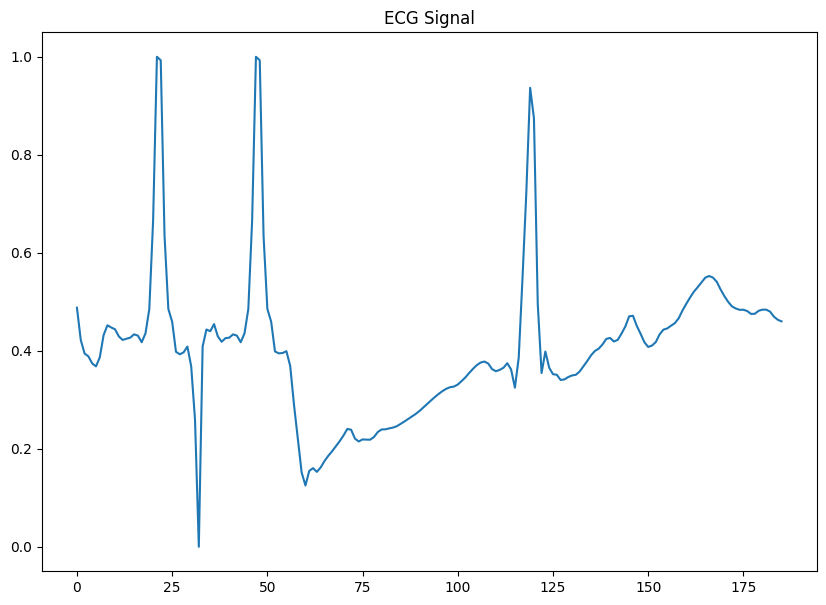

1/1 [==============================] - 0s 21ms/step


{'n': 0.74, 's': 0.23, 'v': 0.03, 'f': 0.0, 'q': 0.0}

In [109]:
predict_class("cardiogram_Mateusz.log", model_cnn2)

#### RESNET

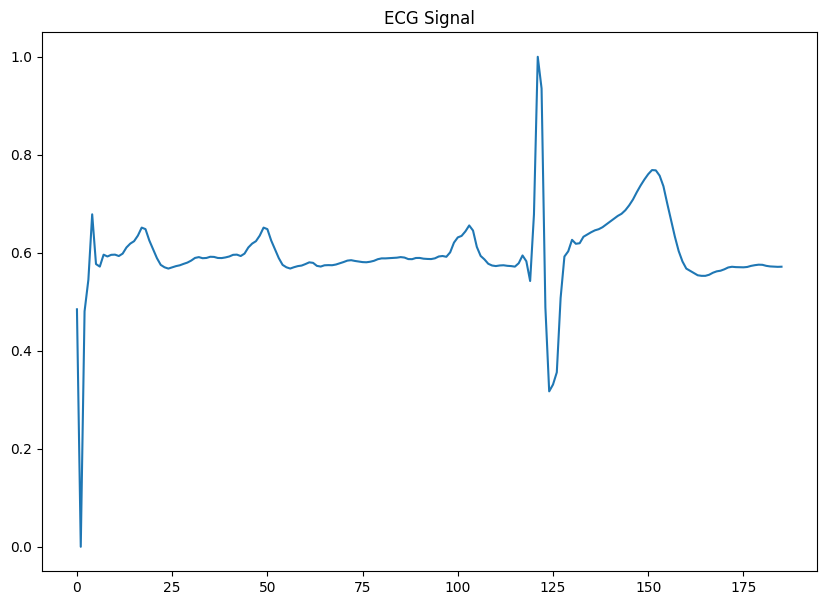

1/1 [==============================] - 0s 23ms/step


{'n': 0.0, 's': 0.34, 'v': 0.4, 'f': 0.26, 'q': 0.0}

In [110]:
predict_class("cardiogram_Maciek.log", model_resnet)

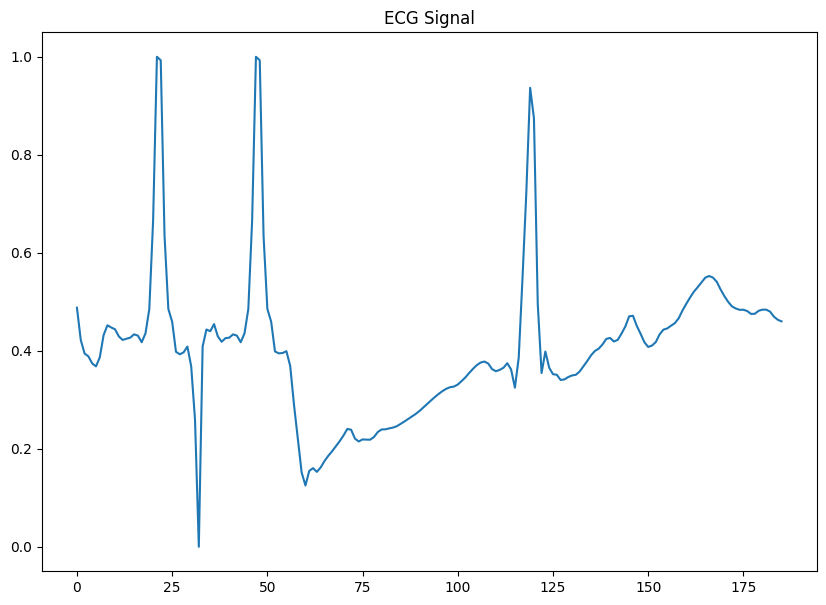

1/1 [==============================] - 0s 25ms/step


{'n': 0.0, 's': 0.0, 'v': 1.0, 'f': 0.0, 'q': 0.0}

In [111]:
predict_class("cardiogram_Mateusz.log", model_resnet)

#### LSTM

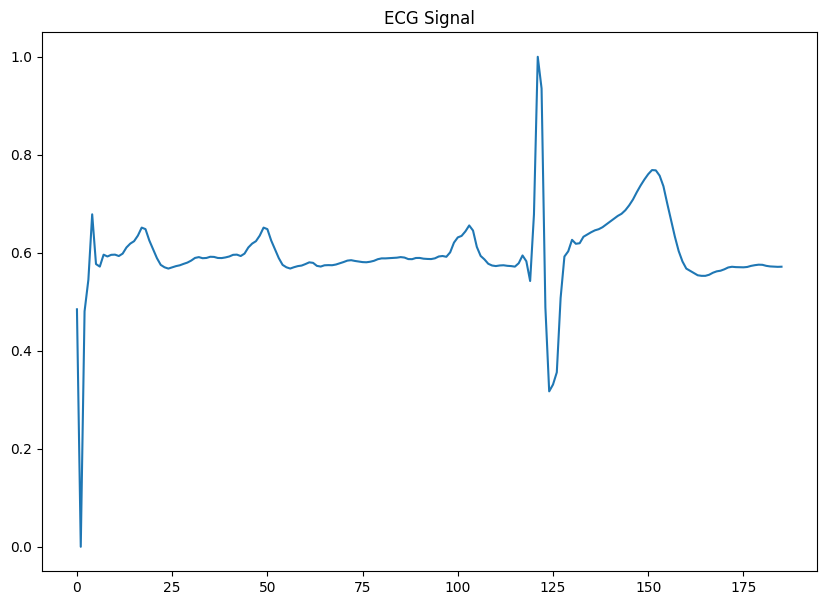

1/1 [==============================] - 0s 26ms/step


{'n': 0.4499999999999999, 's': 0.38, 'v': 0.16, 'f': 0.01, 'q': 0.0}

In [112]:
predict_class("cardiogram_Maciek.log", model_lstm)

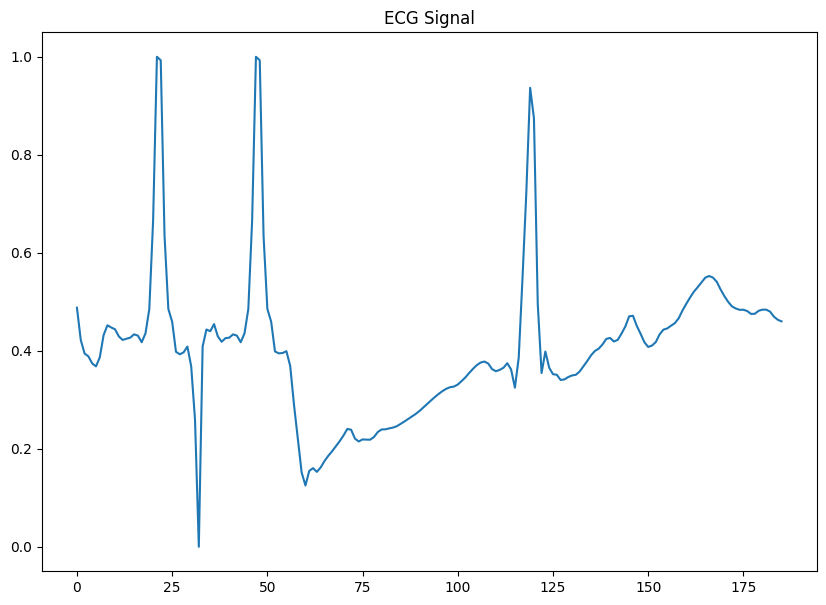

1/1 [==============================] - 0s 27ms/step


{'n': 0.3, 's': 0.5700000000000001, 'v': 0.13, 'f': 0.0, 'q': 0.0}

In [113]:
predict_class("cardiogram_Mateusz.log", model_lstm)

#### CNN & LSTM

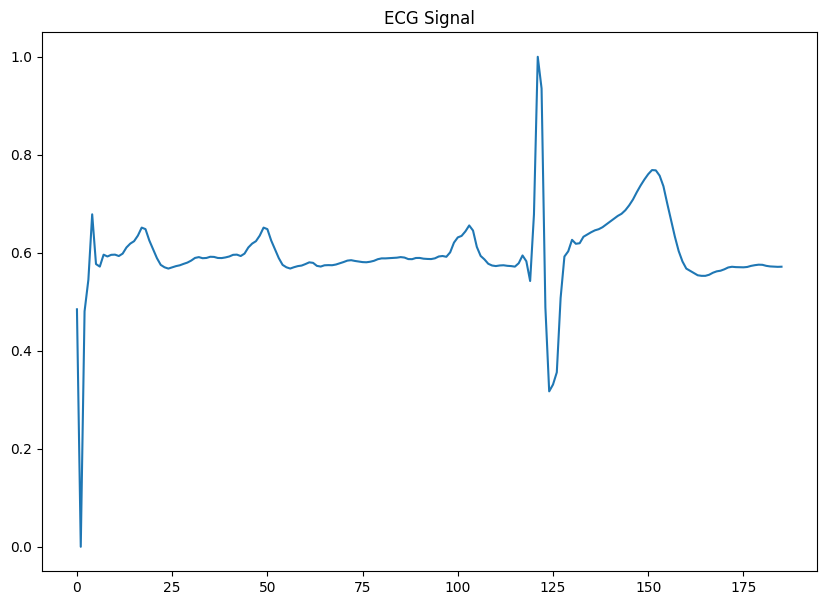

1/1 [==============================] - 0s 31ms/step


{'n': 0.06, 's': 0.25, 'v': 0.69, 'f': 0.0, 'q': 0.0}

In [114]:
predict_class("cardiogram_Maciek.log", model_cnn_lstm)

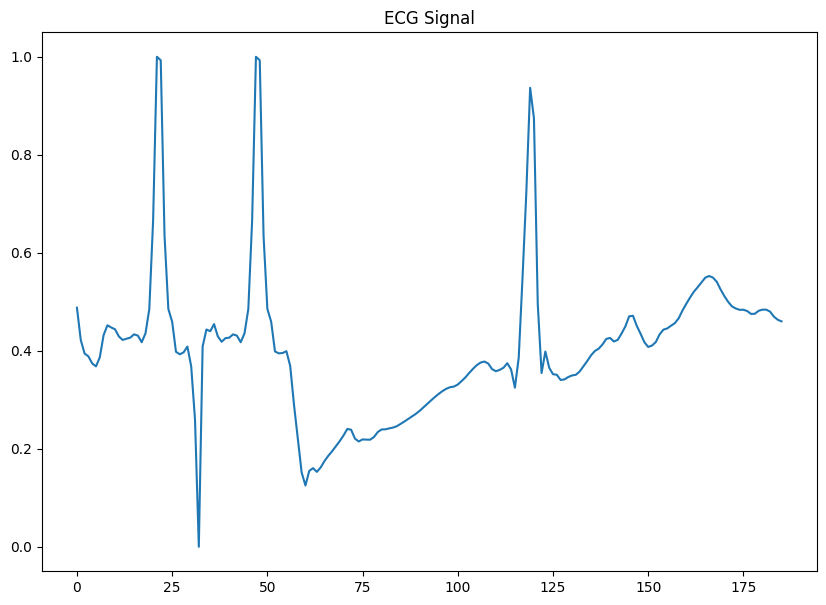

1/1 [==============================] - 0s 26ms/step


{'n': 0.18, 's': 0.48, 'v': 0.34, 'f': 0.0, 'q': 0.0}

In [115]:
predict_class("cardiogram_Mateusz.log", model_cnn_lstm)